In [24]:
import pandas as pd
import numpy as np
from itertools import chain
from collections import Counter
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.offline as py
from plotly import tools
from plotly.offline import iplot
import matplotlib.pyplot as plt

In [2]:
jd_databases = pd.read_csv("Job Description Dataset/databases_job_profile.csv")
jd_databases=jd_databases.fillna(0)
jd_databases.head()

,uniq_id,aster data,filemaker pro,firebird,greenplum,hsqldb,ibm db2,informix,mariadb,memsql,...,oracle,panorama,postgresql,sap hana,sqlite,teradata,timesten,unidata,universe,vertica
0,418ff92580b270ef4e7c14f0ddfc36b4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8aec88cba08d53da65ab99cf20f6f9d9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46baa1f69ac07779274bcd90b85d9a72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3941b2f206ae0f900c4fba4ac0b18719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45efa1f6bc65acc32bbbb953a1ed13b7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
jd_databases['database'] = (jd_databases.iloc[:, 1:] == 1).idxmax(1)
jobDescription1=jd_databases[['database']]
jobDescription1.head()

,database
0,aster data
1,aster data
2,aster data
3,mysql
4,aster data


In [4]:
jd_domain = pd.read_csv("Job Description Dataset/domain_job_profile.csv")
jd_domain=jd_domain.fillna(0)
jd_domain.head()

# jd_domain['domain'] = (jd_domain.iloc[:, 1:] == 1).idxmax(1)
# jobDescription1=pd.concat([ jobDescription1,jd_domain['domain']], axis=1)
# jobDescription1.head()

,uniq_id,Back End,Business analyst,Cloud Computing,Data Scientist,Database Administrator(DBA),DevOps,Enterprise application,Front End,Full stack,...,Information Security,Mobile Developer,Network Engineer,Product Manager,QA/Test Developer,Sales professional,Software Developer/Java Developer,System Administrator,Unnamed: 0,Web Developer
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.00000,0.00000,0.000000,418ff92580b270ef4e7c14f0ddfc36b4,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,8aec88cba08d53da65ab99cf20f6f9d9,0.0
2,2,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,46baa1f69ac07779274bcd90b85d9a72,0.0
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.18067,0.180006,0.0,...,0.0,0.0,0.0,0.0,0.0,0.18099,0.28464,0.173694,3941b2f206ae0f900c4fba4ac0b18719,0.0
4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.00000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,0.000000,45efa1f6bc65acc32bbbb953a1ed13b7,0.0


In [5]:
jd_frameworks = pd.read_csv("Job Description Dataset/frameworks_job_profile.csv")
jd_frameworks=jd_frameworks.fillna(0)
jd_frameworks.head()

# jd_frameworks['framework'] = (jd_frameworks.iloc[:, 1:] == 1).idxmax(1)
# jobDescription1=pd.concat([ jobDescription1,jd_frameworks['framework']], axis=1)
# jobDescription1.head()

,uniq_id,agile,angular,angularjs,asp.net mvc,aura,aurelia,bottle,cakephp,cassandra,...,vanilla,vert.x,vue.js,web2py,wicket,xamarin,yarn,yii,zend,zope
0,418ff92580b270ef4e7c14f0ddfc36b4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8aec88cba08d53da65ab99cf20f6f9d9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46baa1f69ac07779274bcd90b85d9a72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3941b2f206ae0f900c4fba4ac0b18719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45efa1f6bc65acc32bbbb953a1ed13b7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
jd_lang = pd.read_csv("Job Description Dataset/languages_job_profile.csv")
jd_lang=jd_lang.fillna(0)
jd_lang.head()

# for lang in 

# jobDescription1=pd.concat([ jobDescription1,jd_lang['lang']], axis=1)
# jobDescription1.head()

,uniq_id,.net,abap,abc,actionscript,ada,ajax,apex,apl,applescript,...,tom,transact-sql,typescript,vbscript,verilog,vhdl,visual basic .net,xen,xquery,xslt
0,418ff92580b270ef4e7c14f0ddfc36b4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8aec88cba08d53da65ab99cf20f6f9d9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46baa1f69ac07779274bcd90b85d9a72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3941b2f206ae0f900c4fba4ac0b18719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45efa1f6bc65acc32bbbb953a1ed13b7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
jd_platforms = pd.read_csv("Job Description Dataset/platforms_job_profile.csv")
jd_platforms=jd_platforms.fillna(0)
jd_platforms.head()

,uniq_id,amazon echo,android,arduino,aws,azure,drupal,firebase,gaming console,heroku,ios,linux,mac os,mainframe,predix,raspberry pi,salesforce,sharepoint,windows phone,wordpress
0,418ff92580b270ef4e7c14f0ddfc36b4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8aec88cba08d53da65ab99cf20f6f9d9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46baa1f69ac07779274bcd90b85d9a72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3941b2f206ae0f900c4fba4ac0b18719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45efa1f6bc65acc32bbbb953a1ed13b7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
jd = pd.read_csv("Job Description Dataset/dice_com-job_us_sample.csv")
jd.head(n=2)

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9


In [9]:
# jd_databases
# jd_domain
# jd_frameworks
# jd_lang
# jd_platforms

In [10]:
dataBase_list=jd_databases.apply(lambda row: row[row == 1].index.tolist() , axis=1)
domain_list=jd_domain.apply(lambda row: row[row == 1].index.tolist() , axis=1)
framework_list=jd_frameworks.apply(lambda row: row[row == 1].index.tolist() , axis=1)
lang_list=jd_lang.apply(lambda row: row[row == 1].index.tolist() , axis=1)
platform_list=jd_platforms.apply(lambda row: row[row == 1].index.tolist() , axis=1)


In [11]:
skills=pd.concat([framework_list,lang_list],axis=1)
skills['skills']=(skills[0]+skills[1]).map(set).map(list)
# skills.rename(columns = {2:"skills"}, inplace = True)
skills.head()
jobDescription1=pd.concat([jd[["uniq_id"]],dataBase_list,domain_list,skills[["skills"]],platform_list], axis=1)

In [12]:
jobDescription1.rename(columns = {"uniq_id":"JobId",0:'databases',1:"domain",2:"platform"}, inplace = True)
# print(dataBase_list)
jobDescription1.head()

,JobId,databases,domain,skills,platform
0,418ff92580b270ef4e7c14f0ddfc36b4,[],[QA/Test Developer],"[java, bourne shell, groovy]",[]
1,8aec88cba08d53da65ab99cf20f6f9d9,[],"[uniq_id, Information Security]","[perl, python]",[]
2,46baa1f69ac07779274bcd90b85d9a72,[],[Business analyst],[],[]
3,3941b2f206ae0f900c4fba4ac0b18719,"[mysql, oracle]",[],[],[]
4,45efa1f6bc65acc32bbbb953a1ed13b7,[],[DevOps],"[puppet, go]",[linux]


In [21]:
Skills_co = pd.Series(Counter(chain.from_iterable(jobDescription1.skills)))
Skills_co

java            3726
bourne shell       2
groovy           100
perl             847
python          1776
                ... 
lithium            4
monkey             1
applescript        2
tom                1
pilot              1
Length: 215, dtype: int64

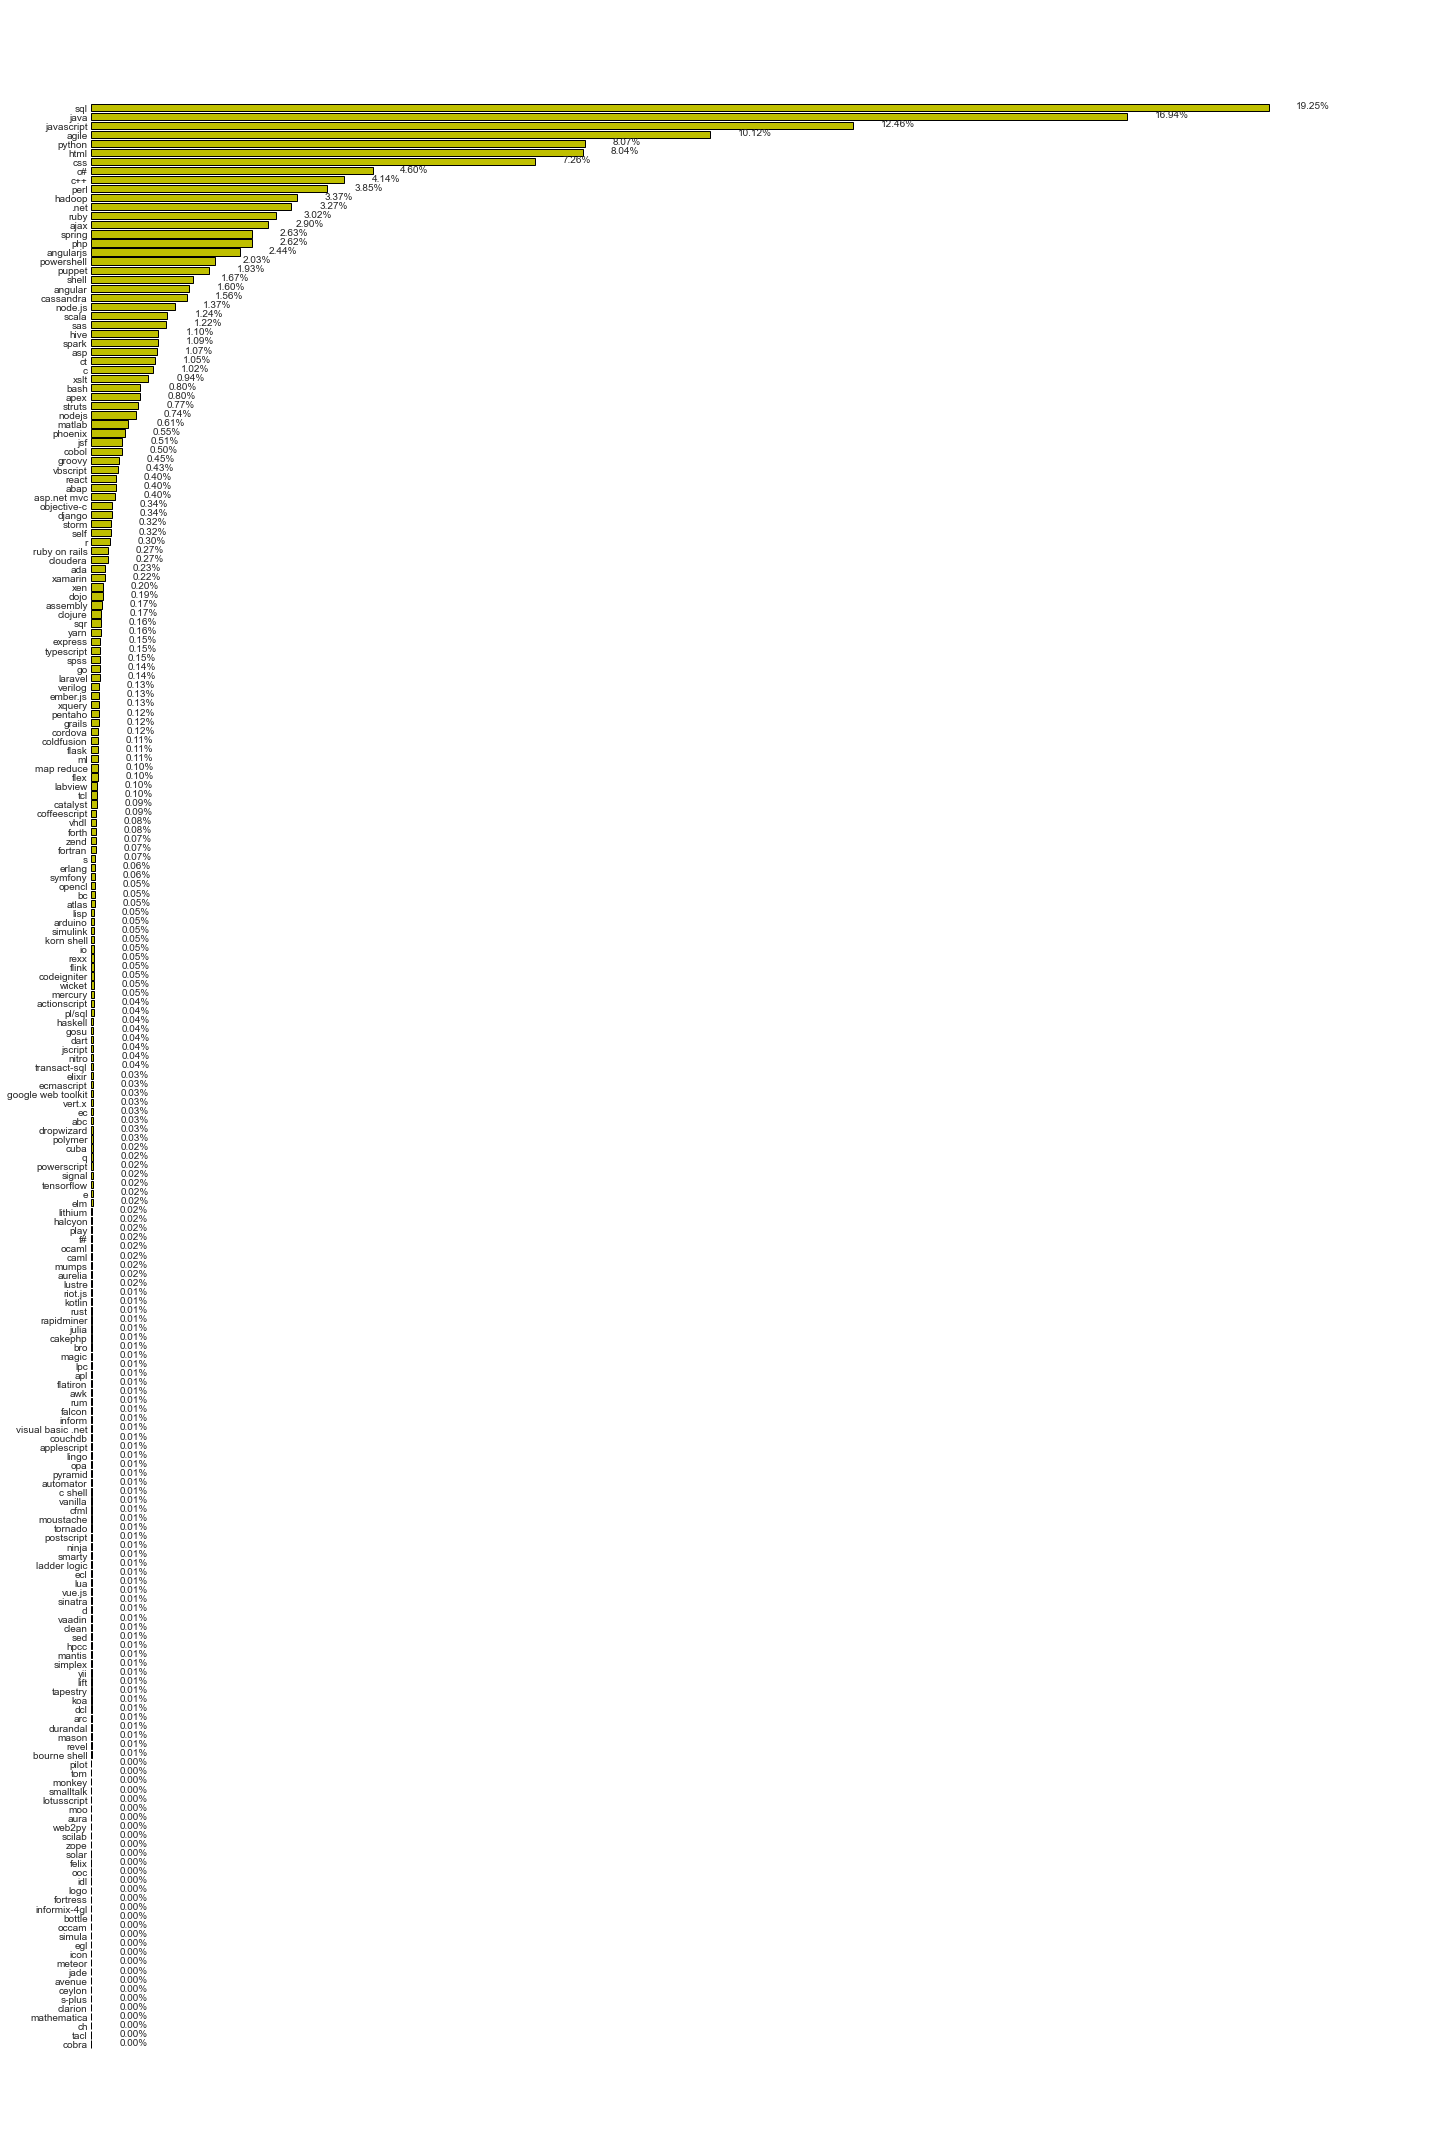

In [28]:
plt.style.use('seaborn-dark')

# current lw users
lw = {}
for x in jobDescription1.skills:
    for d in x:
        if d not in lw:
            lw[d] = 1   # create new instance
        else:
            lw[d] += 1  # increments that instance           
lw = {k:v for k,v in sorted(lw.items(), key=lambda x:x[1])}
pos = np.arange(0,len(lw.keys()), 1)
labels = [x for x in lw.keys()]
tot =jobDescription1.skills.count()
pcnts = [round(100*x/tot, 2) for x in lw.values()]

fig, ax = plt.subplots(figsize=(20,30))
fig.subplots_adjust(hspace=0.01)

ax.barh(labels, lw.values(), color='y', edgecolor='k')
ax.set_xticks(np.arange(0, max(lw.values())+600, 100))
ax.xaxis.set_ticklabels([])
for (y, p), x  in zip(enumerate(pcnts), lw.values()):
    ax.annotate("%.2f%%"%p, (x+100 ,y-0.125))
ax.xaxis.set_ticks_position('none')
ax.set_frame_on(False)
# prettify(ax)
fig.tight_layout()

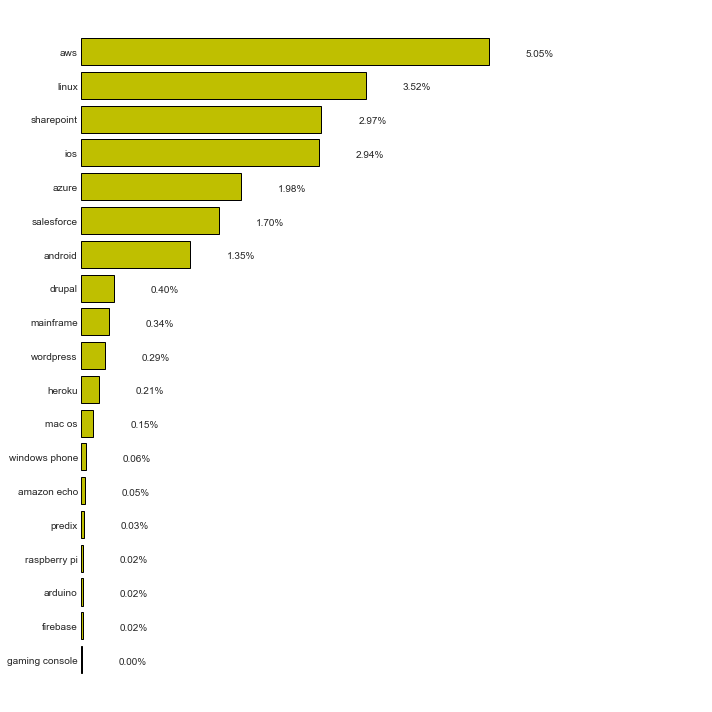

In [31]:
plt.style.use('seaborn-dark')

# current lw users
lw = {}
for x in jobDescription1.platform:
    for d in x:
        if d not in lw:
            lw[d] = 1   # create new instance
        else:
            lw[d] += 1  # increments that instance           
lw = {k:v for k,v in sorted(lw.items(), key=lambda x:x[1])}
pos = np.arange(0,len(lw.keys()), 1)
labels = [x for x in lw.keys()]
tot =jobDescription1.platform.count()
pcnts = [round(100*x/tot, 2) for x in lw.values()]

fig, ax = plt.subplots(figsize=(10,10))
fig.subplots_adjust(hspace=0.01)

ax.barh(labels, lw.values(), color='y', edgecolor='k')
ax.set_xticks(np.arange(0, max(lw.values())+600, 100))
ax.xaxis.set_ticklabels([])
for (y, p), x  in zip(enumerate(pcnts), lw.values()):
    ax.annotate("%.2f%%"%p, (x+100 ,y-0.125))
ax.xaxis.set_ticks_position('none')
ax.set_frame_on(False)
# prettify(ax)
fig.tight_layout()

In [13]:
from neo4j import GraphDatabase
import logging
from neo4j.exceptions import ServiceUnavailable

class App:

    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        # Don't forget to close the driver connection when you are finished with it
        self.driver.close()

    def create_friendship(self, person1_name,skillVal,osNameVal,devTypeVal):
        with self.driver.session() as session:
            # Write transactions allow the driver to handle retries and transient errors
            result = session.write_transaction(
                self._create_and_return_friendship, person1_name,skillVal,osNameVal,devTypeVal)
            for row in result:
                print("Created Node between: {p1}, {p2}".format(p1=row['p1'], p2=row['p2']))
            # for skills
            iter=9
            for skill in skillVal:
                result = session.write_transaction(
                    self._create_and_return_skillship, person1_name,skill,iter
                )
                iter+=1
                # for row in result:
                #     print("Created Node between: {p1}, {p2}".format(p1=row['p1'], p2=row['p2']))

    @staticmethod
    def _create_and_return_skillship(tx, person1_name, skill,iter):
        query = (
            "MERGE (p1:JobId { name: $person1_name }) "
        )
        query +=( " MERGE (p" + str(iter) + ":Skill { name:" + "$skill" + "})" )
        relationQuery=( "CREATE (p1)-[:shouldKnow]->(p"+str(iter) +")" )
        query+=relationQuery
        returnQueryVar="RETURN p"+str(iter)
        query+=returnQueryVar
        result = tx.run(query, person1_name=person1_name,skill=skill,iter=iter)
        try:
            return
            # print("from skillsjip")
            # print(result)
            # return [{"p1": row["p1"]["name"], "p2": row["p2"]["name"]}
            #         for row in result]
        # Capture any errors along with the query and data for traceability
        except ServiceUnavailable as exception:
            logging.error("{query} raised an error: \n {exception}".format(
                query=query, exception=exception))
            raise

    @staticmethod
    def _create_and_return_friendship(tx, person1_name,skillVal,osNameVal,devTypeVal):
        # To learn more about the Cypher syntax, see https://neo4j.com/docs/cypher-manual/current/
        # The Reference Card is also a good resource for keywords https://neo4j.com/docs/cypher-refcard/current/
        query = (
            "MERGE (p1:JobId { name: $person1_name }) "
            "MERGE (p3:OperatingSystem { name: $osNameVal }) "
            "MERGE (p6:DevType { name: $devTypeVal }) "
        )

        relationQuery=(
            "CREATE (p1)-[:requireOs]->(p3) "
            "CREATE (p1)-[:shouldWorksOn]->(p6) "
        )

        returnQueryVar="RETURN p1,p3,p6"

        query+=relationQuery
        result = tx.run(query, person1_name=person1_name,skillVal=skillVal,osNameVal=osNameVal,devTypeVal=devTypeVal)
        query+=returnQueryVar
      
        
        try:
            return [{"p1": row["p1"]["name"], "p2": row["p2"]["name"]}
                    for row in result]
        # Capture any errors along with the query and data for traceability
        except ServiceUnavailable as exception:
            logging.error("{query} raised an error: \n {exception}".format(
                query=query, exception=exception))
            raise
        
    def find_person(self, person_name):
        with self.driver.session() as session:
            result = session.read_transaction(self._find_and_return_person, person_name)
            for row in result:
                print("Found person: {row}".format(row=row))

    @staticmethod
    def _find_and_return_person(tx, person_name):
        query = (
            "MATCH (p:Person) "
            "WHERE p.name = $person_name "
            "RETURN p.name AS name"
        )
        result = tx.run(query, person_name=person_name)
        return [row["name"] for row in result]


if __name__ == "__main__":
    # Aura queries use an encrypted connection using the "neo4j+s" URI scheme
    uri = "neo4j://localhost:7687"
    user = "neo4j"
    password = "amit"
    app = App(uri, user, password)
    for index,rows in jobDescription1.iterrows():
        jobId=rows['JobId'] 
        skillVal=rows['skills']
        osNameVal=rows['platform']
        devTypeVal=rows['domain']
        # print(resId,gednerVal)
        app.create_friendship(jobId,skillVal,osNameVal,devTypeVal)
    app.find_person("India")
    app.close()

Unable to retrieve routing information
Transaction failed and will be retried in 1.0580466739577492s (Unable to retrieve routing information)
Unable to retrieve routing information
Transaction failed and will be retried in 1.9182830173742285s (Unable to retrieve routing information)
Unable to retrieve routing information
Transaction failed and will be retried in 3.26881397840114s (Unable to retrieve routing information)


KeyboardInterrupt: 